# Importing the Libraries

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For Plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\thape\AppData\Local\Temp\ipykernel_14116\42344135.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# Data Ingestion

In [2]:
# Loading of the dataset
df = pd.read_csv('WebserverLogFiles.csv')

# Date Preparation
Exploratory Data Analysis

In [3]:
# Check the dataframe
df.head(10)

,Time of Visit,IP Address,Request Method,Status Code,Navigation Pages,Country,Sports,Number of Visit,Gender,Age
0,10:34:45,146.154.7.248,HEAD,200,news.html,Ukraine,Table Tennis,Seldon,Male,33
1,19:57:24,49.97.116.238,HEAD,301,searchsports.html,Czech Republic,Baseball,Often,Female,47
2,18:27:55,194.105.252.236,PATCH,301,sechedule.html,Chile,Athletics,Seldon,Non-binary,36
3,17:04:05,35.83.14.252,PUT,200,news.html,Poland,Swimming,Seldon,Female,64
4,23:03:39,74.209.200.162,HEAD,100,ticketing.html,China,Table Tennis,Once,Male,39
5,13:17:23,77.165.12.241,POST,200,images/games.html,Botswana,Table Tennis,Often,Female,32
6,14:30:28,174.53.234.199,PATCH,200,index.html,Philippines,Baseball,Often,Male,21
7,05:15:22,241.91.235.4,HEAD,400,venue information.html,Indonesia,Gymnastics,Daily,Male,23
8,14:19:06,153.61.22.129,PATCH,200,images/games.html,Niger,Football,Never,Non-binary,57
9,05:56:52,255.237.98.248,HEAD,403,images/games.html,China,Swimming,Seldon,Female,62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32873 entries, 0 to 32872
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Time of Visit     32873 non-null  object
 1   IP Address        32873 non-null  object
 2   Request Method    32812 non-null  object
 3   Status Code       32873 non-null  int64 
 4   Navigation Pages  32801 non-null  object
 5   Country           32872 non-null  object
 6   Sports            32796 non-null  object
 7   Number of Visit   32805 non-null  object
 8   Gender            32797 non-null  object
 9   Age               32873 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [5]:
df.describe()

,Status Code,Age
count,32873.000000,32873.000000
mean,214.283546,43.869254
std,83.365416,15.306073
min,100.000000,18.000000
25%,200.000000,31.000000
50%,200.000000,44.000000
75%,200.000000,57.000000
max,500.000000,70.000000


In [6]:
# Shape of the dataset for columns and rows
df.shape

(32873, 10)

In [7]:
# Checking of the missing records
null_counts = df.isnull().sum()
print(null_counts)

Time of Visit        0
IP Address           0
Request Method      61
Status Code          0
Navigation Pages    72
Country              1
Sports              77
Number of Visit     68
Gender              76
Age                  0
dtype: int64


In [8]:
# Filter out columns with any null records
columns_with_null = null_counts[null_counts > 0].index
print(columns_with_null)

Index(['Request Method', 'Navigation Pages', 'Country', 'Sports',
       'Number of Visit', 'Gender'],
      dtype='object')


In [9]:
# Removing of the missing records
df1= df.dropna()

In [10]:
# Shape of the dataset for columns and rows after
df1.shape

(32709, 10)

In [11]:
# Checking of the missing records
null_counts = df1.isnull().sum()
print(null_counts)

Time of Visit       0
IP Address          0
Request Method      0
Status Code         0
Navigation Pages    0
Country             0
Sports              0
Number of Visit     0
Gender              0
Age                 0
dtype: int64


# Exploratory Data Analysis

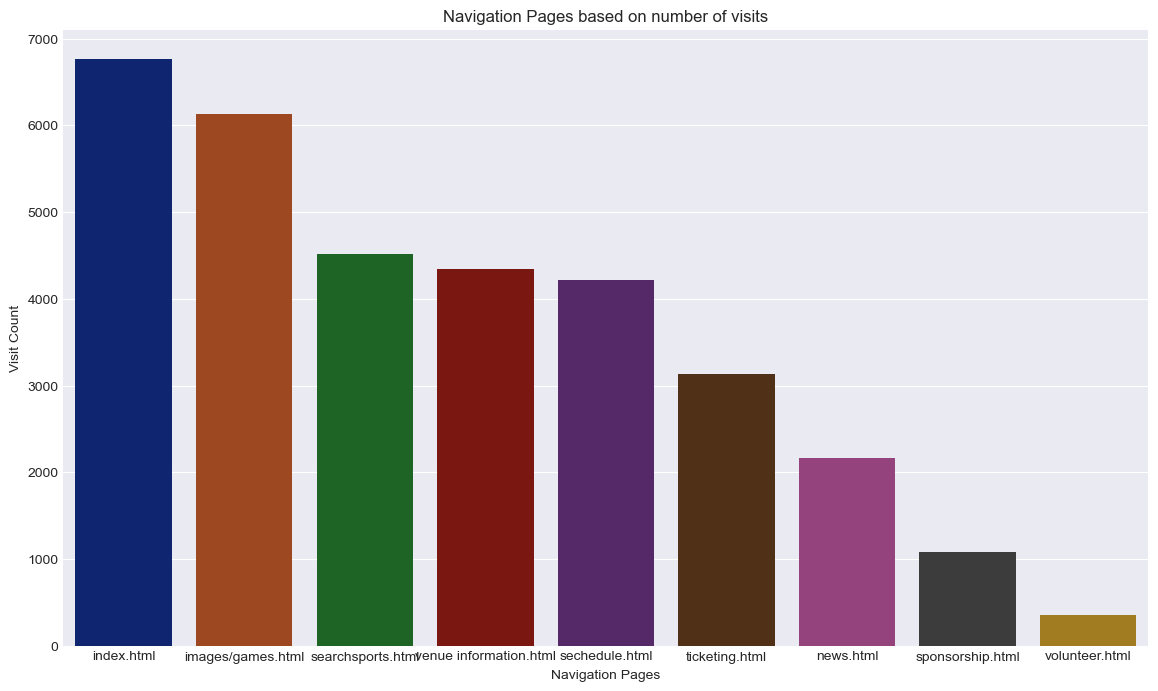

In [12]:
# Bar chart visualizations for Navigation Pages based on number of visits.
Pages_visits = df1.groupby('Navigation Pages')['Number of Visit'].count().reset_index().sort_values(by='Number of Visit', ascending=False)
plt.figure(figsize=(14,8))
sns.barplot(x='Navigation Pages', y='Number of Visit',data=Pages_visits, palette='dark')
plt.title('Navigation Pages based on number of visits')
plt.xlabel('Navigation Pages')
plt.ylabel('Visit Count')
plt.show()

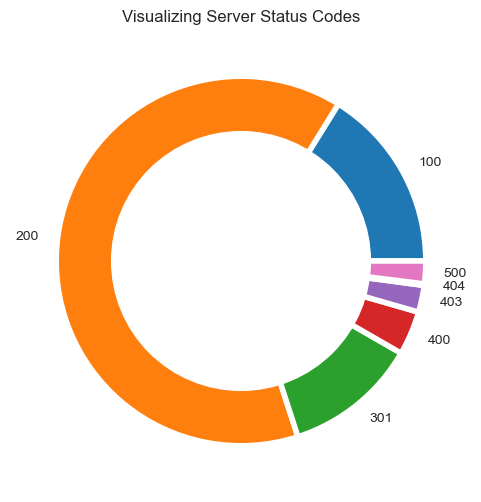

In [13]:
# Visualizing Website Accessibility Status Codes through a Donut Chart
Status_Code = df1.groupby('Status Code')['Number of Visit'].count().reset_index()
Status_Code['Proportion'] = Status_Code['Number of Visit'] / Status_Code['Number of Visit'].sum()
plt.figure(figsize=(6,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Status_Code['Proportion'], labels = Status_Code['Status Code'], wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' })
p=plt.gcf() 
p.gca().add_artist(my_circle)
plt.title('Visualizing Server Status Codes')
plt.show()

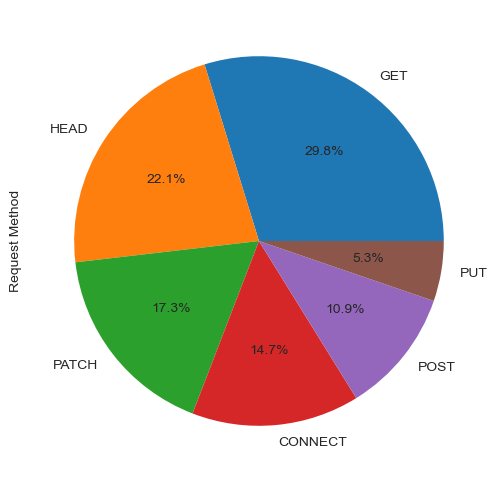

In [14]:
# Frequencies of different Request Methods 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
Piechart= df1['Request Method'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(6, 6))
plt.show()

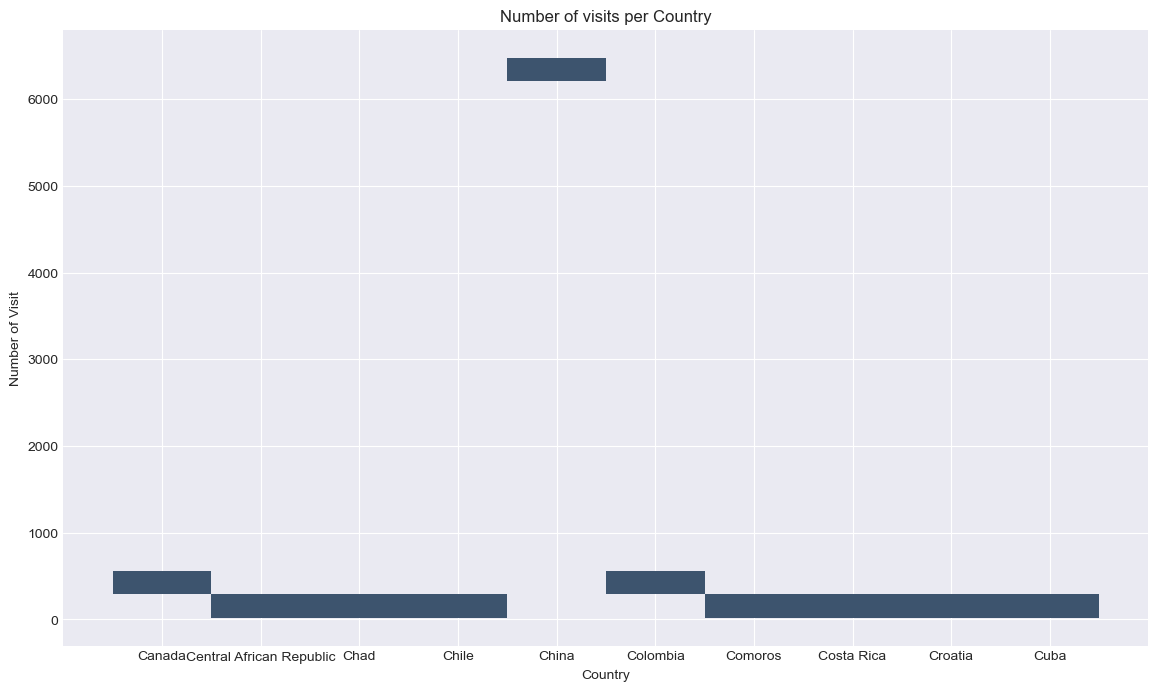

In [15]:
# Histogram visualization for Number of Visits by Country
Country_Visits = df1.groupby('Country')['Number of Visit'].count().reset_index()
plt.figure(figsize=(14,8))
sns.histplot(x='Country', y='Number of Visit', data=Country_Visits[25:35])
plt.title('Number of visits per Country')
plt.xlabel('Country')
plt.ylabel('Number of Visit')
plt.show()

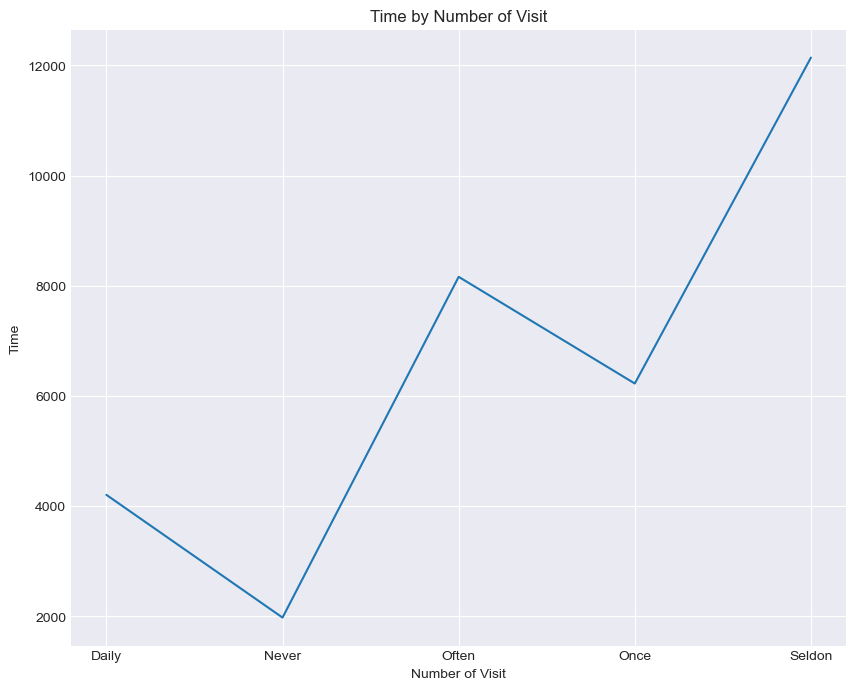

In [16]:
# Line graph showing Time by Frequency of Visit 
Frequency = df1.groupby('Number of Visit')['Time of Visit'].count().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(x='Number of Visit', y='Time of Visit', data=Frequency)
plt.title('Time by Number of Visit')
plt.xlabel('Number of Visit')
plt.ylabel('Time')
plt.show()

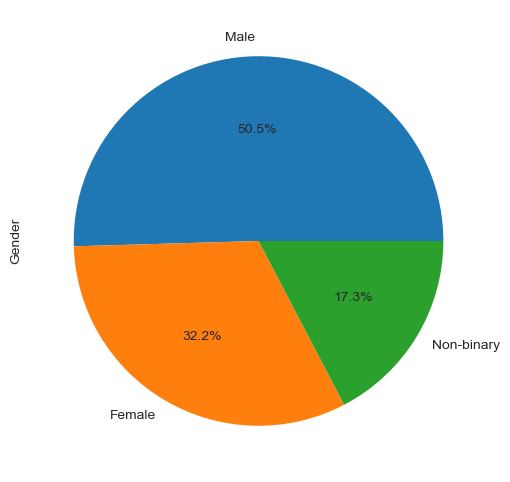

In [17]:
# Pie chart Distribution of visits based on gender
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
Piechart= df1['Gender'].value_counts(ascending=False).plot.pie(colors=colors,autopct='%1.1f%%',figsize=(6, 6))
plt.show()

# User Segmentation

In [18]:
# Segmentation by Country
country_segmentation = df1.groupby('Country').size().reset_index(name='Visit Count')
print(country_segmentation)

            Country  Visit Count
0       Afghanistan          149
1           Albania          134
2           Algeria            1
3    American Samoa            6
4            Angola           28
..              ...          ...
136       Venezuela          160
137         Vietnam          293
138           Yemen          130
139          Zambia           43
140        Zimbabwe           26

[141 rows x 2 columns]


In [19]:
# Segmentation by Gender
gender_segmentation = df1.groupby('Gender').size().reset_index(name='Visit Count')
print(gender_segmentation)

       Gender  Visit Count
0      Female        10533
1        Male        16505
2  Non-binary         5671


In [20]:
# User Segmentation by Gender and Age
gender_age_segmentation = df1.groupby(['Gender', 'Age']).size().reset_index(name='User Count')
gender_age_segmentation = gender_age_segmentation.sort_values(by=['User Count'], ascending=False)
print("\nUser Segmentation by Gender and Age:")
print(gender_age_segmentation)


User Segmentation by Gender and Age:
         Gender  Age  User Count
98         Male   63         368
91         Male   56         348
73         Male   38         340
104        Male   69         337
87         Male   52         336
..          ...  ...         ...
118  Non-binary   30          94
127  Non-binary   39          93
141  Non-binary   53          90
153  Non-binary   65          88
121  Non-binary   33          84

[159 rows x 3 columns]


# Clickstream Analysis

In [21]:
# Page Views Analysis
page_views = df1['Sports'].value_counts().reset_index()
page_views.columns = ['Sports', 'Page Views']
print(page_views)

           Sports  Page Views
0        Swimming        5174
1       Athletics        4974
2        Football        4338
3    Table Tennis        3666
4      Basketball        2760
5      Volleyball        2285
6       Badminton        2010
7      Gymnastics        1753
8        Baseball        1690
9   Weightlifting        1272
10         Karate         774
11         Boxing         743
12      Wrestling         513
13        Fencing         264
14         Diving         252
15       Shooting         241


# Conversion Analysis

In [22]:
# Funnel Analysis
funnel_data = df1.groupby('Navigation Pages').size().reset_index(name='Visits')
funnel_data['Conversion Rate'] = funnel_data['Visits'].div(funnel_data['Visits'].iloc[0])
funnel_data = funnel_data.sort_values(by='Visits', ascending=False)
print(funnel_data)

         Navigation Pages  Visits  Conversion Rate
1              index.html    6763         1.102543
0       images/games.html    6134         1.000000
3       searchsports.html    4514         0.735898
7  venue information.html    4341         0.707695
4          sechedule.html    4220         0.687969
6          ticketing.html    3135         0.511086
2               news.html    2162         0.352462
5        sponsorship.html    1084         0.176720
8          volunteer.html     356         0.058037


In [23]:
# Funnel Analysis
funnel_data = df1.groupby('Sports').size().reset_index(name='Visits')
funnel_data['Conversion Rate'] = funnel_data['Visits'].div(funnel_data['Visits'].iloc[0])
funnel_data = funnel_data.sort_values(by='Visits', ascending=False)
print(funnel_data)

           Sports  Visits  Conversion Rate
11       Swimming    5174         1.040209
0       Athletics    4974         1.000000
7        Football    4338         0.872135
12   Table Tennis    3666         0.737033
3      Basketball    2760         0.554885
13     Volleyball    2285         0.459389
1       Badminton    2010         0.404101
8      Gymnastics    1753         0.352433
2        Baseball    1690         0.339767
14  Weightlifting    1272         0.255730
9          Karate     774         0.155609
4          Boxing     743         0.149377
15      Wrestling     513         0.103136
6         Fencing     264         0.053076
5          Diving     252         0.050663
10       Shooting     241         0.048452


# Linear Regression

In [24]:
le = LabelEncoder()
df['Status Code'] = le.fit_transform(df['Status Code'])

In [25]:
# Select the predictor (X) and target variable (y)
X = df[['Age', 'Status Code']]
y = df['Age']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create a linear regression model and Fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the target variable for the test data
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 0.0


# Clustering

In [30]:
# Select the features for clustering
df_numeric = df1[['Age', 'Status Code']]

In [31]:
# Standardize the features
scaler = StandardScaler()
df_numeric_std = scaler.fit_transform(df_numeric)

In [32]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
df_numeric_pca = pca.fit_transform(df_numeric_std)

In [33]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric_pca)
    sse.append(kmeans.inertia_)

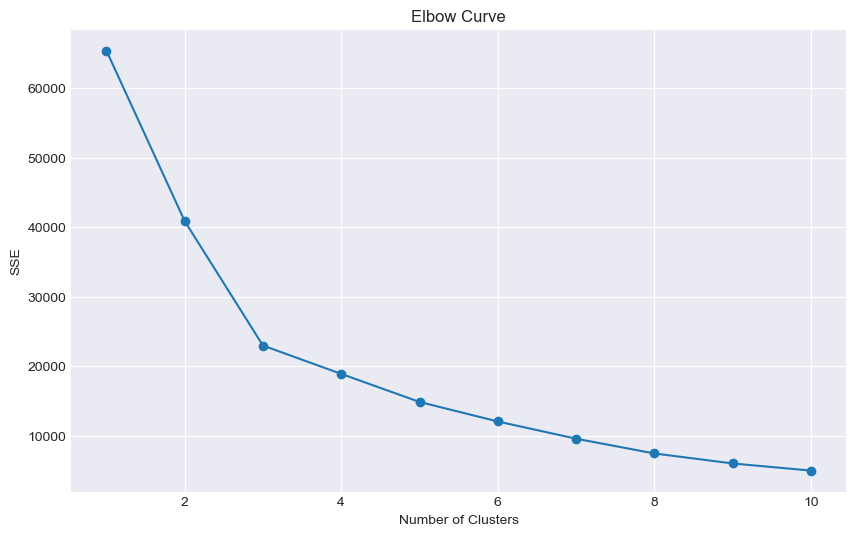

In [34]:
# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show()

In [35]:
# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_numeric_pca)

KMeans(n_clusters=3, random_state=42)

In [36]:
# Assign cluster labels to the data
cluster_labels = kmeans.labels_

In [37]:
# Add cluster labels to the DataFrame
df1['Cluster'] = cluster_labels

In [38]:
# Analyze the clusters
cluster_counts = df1['Cluster'].value_counts()
print(cluster_counts)

1    13558
2    13527
0     5624
Name: Cluster, dtype: int64


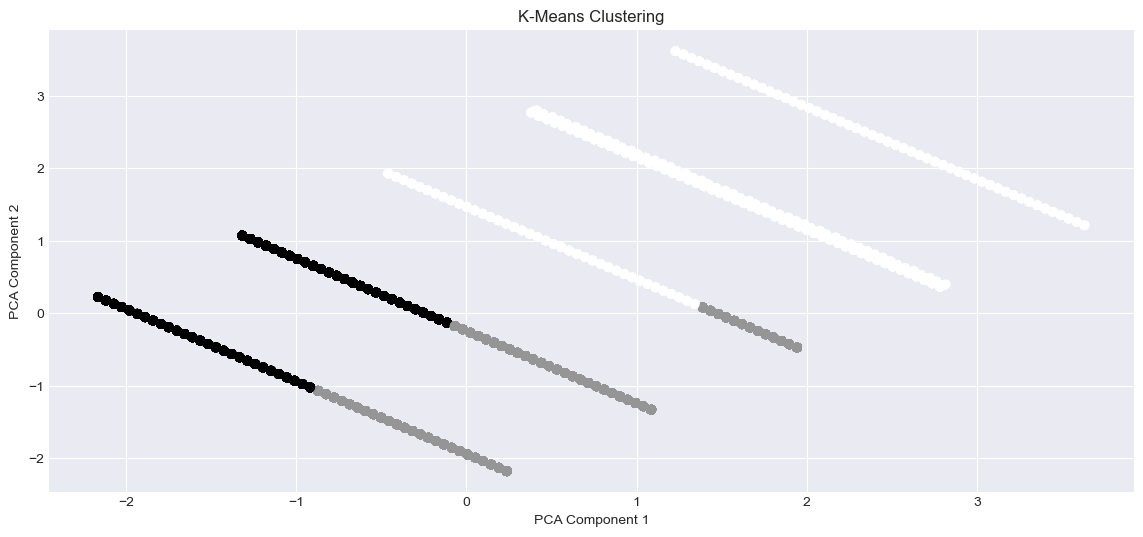

In [39]:
# Create a scatter plot of the data with different colors for each cluster
plt.figure(figsize=(14,6))
plt.scatter(df_numeric_pca[:,0], df_numeric_pca[:,1], c=kmeans.labels_)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [40]:
filename = "WebserverLogFiles_Final.csv"
df1.to_csv(filename, index=False)

print(f"Data has been exported to '{filename}'.")

Data has been exported to 'WebserverLogFiles_Final.csv'.


In [41]:
from IPython.display import IFrame
Dashboard = IFrame(src="https://app.powerbi.com/view?r=eyJrIjoiNWZmZjAwMTUtMThlYS00ZGM0LTk0ZGUtNjJlODBhMDdkNTAwIiwidCI6ImVlMjkyOTc3LTdiNTgtNGRmNC04MTM4LTUwZDBkZTdkMjhkOCIsImMiOjh9", height = 700, width = 980)
display(Dashboard)